In [5]:
# Display the loaded image in a window
cv2.imshow('Loaded Image', image)

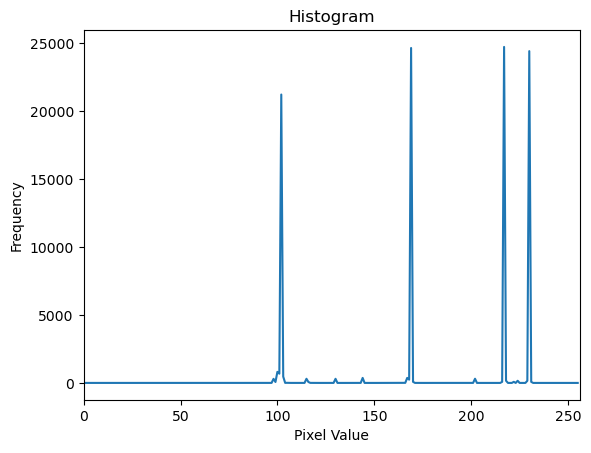

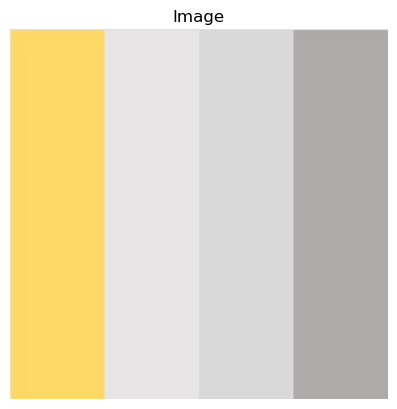

In [6]:
import matplotlib.pyplot as plt
histogram = cv2.calcHist([image], [0], None, [256], [0, 256])
# Plot the histogram
plt.figure()
plt.title("Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.plot(histogram)
plt.xlim([0, 256])

# Show the image
plt.figure()
plt.title("Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

# Display both the image and the histogram
plt.show()

In [8]:
height, width, channels = image.shape

print(f"Image width (columns): {width} pixels")
print(f"Image height (rows): {height} pixels")
print(f"Number of channels: {channels}")

Image width (columns): 320 pixels
Image height (rows): 313 pixels
Number of channels: 3


In [ ]:
import pandas as pd
import numpy as np
 # Convert the histogram to a table (DataFrame)
pixel_values = np.arange(256)  # Pixel values from 0 to 255
frequency = histogram.flatten().astype(int)  # Flatten and convert to integers

# Create a DataFrame
df = pd.DataFrame({'Pixel Value': pixel_values, 'Frequency': frequency})

 # Temporarily set Pandas option to display all rows
pd.set_option('display.max_rows', None)

# Display the table
print(df)

# Reset Pandas option to its default setting
pd.reset_option('display.max_rows')

### Install Libraries

In [ ]:
# Install OpenCV
%pip install opencv-python

### Import Libraries

In [1]:
# Import openCV

import cv2


import matplotlib.pyplot as plt

import numpy as np

from scipy.signal import find_peaks

import heapq


### Question 1

In [2]:
image = cv2.imread('Data/rect1.jpg')

height, width,channels= image.shape

print(f"Image width (columns): {width} pixels")
print(f"Image height (rows): {height} pixels")
print(f"Number of channels: {channels}")

Image width (columns): 379 pixels
Image height (rows): 277 pixels
Number of channels: 3


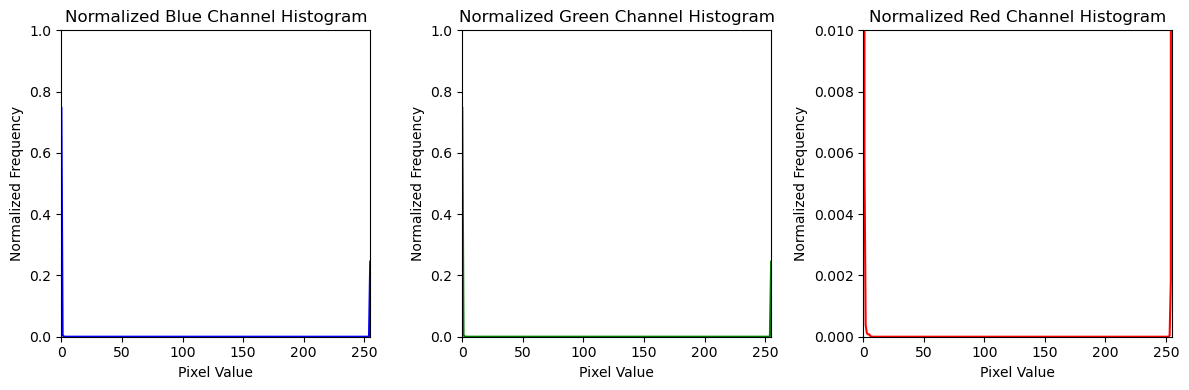

In [3]:
blue_channel = image[:, :, 0]  # Blue channel is the first channel (0-indexed)
green_channel = image[:, :, 1]  # Green channel is the second channel
red_channel = image[:, :, 2]  # Red channel is the third channel


# Calculate histograms for each channel
blue_histogram = cv2.calcHist([blue_channel], [0], None, [256], [0, 256])
green_histogram = cv2.calcHist([green_channel], [0], None, [256], [0, 256])
red_histogram = cv2.calcHist([red_channel], [0], None, [256], [0, 256])

# Normalize the histograms
blue_histogram /= blue_channel.size
green_histogram /= green_channel.size
red_histogram /= red_channel.size

# Create subplots for each channel's histogram
plt.figure(figsize=(12, 4))

plt.subplot(131)  # Subplot for blue channel histogram
plt.plot(blue_histogram, color='blue')
plt.title('Normalized Blue Channel Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Normalized Frequency')
plt.xlim([0, 255])
plt.ylim([0, 1])

plt.subplot(132)  # Subplot for green channel histogram
plt.plot(green_histogram, color='green')
plt.title('Normalized Green Channel Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Normalized Frequency')
plt.xlim([0, 255])
plt.ylim([0, 1])

plt.subplot(133)  # Subplot for red channel histogram
plt.plot(red_histogram, color='red')
plt.title('Normalized Red Channel Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Normalized Frequency')
plt.xlim([0, 255])
plt.ylim([0, 0.01])

plt.tight_layout()
plt.show()

### Question 2

In [7]:
# Function which takes in images as input and then determines which is boy and which is girl
def DetermineGender(image1, image2):

    # Apply edge detection (Canny)
    edges = cv2.Canny(image1, 50, 150)

    # Apply a threshold to isolate the hair region
    hair_threshold = 200
    hair_mask = (edges > hair_threshold).astype(np.uint8)

    '''
    # Find the top and bottom boundaries of the hair region
    top_boundary = np.min(np.where(hair_mask == 1)[0])
    bottom_boundary = np.max(np.where(hair_mask == 1)[0])

    # Calculate the length of hair in pixels
    hair_length_pixels = bottom_boundary - top_boundary
    '''
    # Display the original image
    cv2.imshow('Original Image', image1)

    # Display the Canny edge image
    cv2.imshow('Canny Edges', edges)
    
    # Display the hair region (optional)
    cv2.imshow('Hair Region', hair_mask)

    # Wait for a key press and close the windows
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [8]:
image1 = cv2.imread('Data/fig3.jpg')
image2 = cv2.imread('Data/fig4.jpg')

# Check if the image was loaded successfully
if image1 is not None and image2 is not None:

    # Convert the colored images to grayscale
    image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
    DetermineGender(image1, image2)
    
else:
    print("Failed to load image.")

In [4]:
import cv2
import numpy as np

# Load the cartoon boy and girl images
boy_image = cv2.imread('Data/fig3.jpg')
girl_image = cv2.imread('Data/fig4.jpg')

# Convert images to grayscale (assuming hair color is different from the face)
boy_gray = cv2.cvtColor(boy_image, cv2.COLOR_BGR2GRAY)
girl_gray = cv2.cvtColor(girl_image, cv2.COLOR_BGR2GRAY)

# Threshold to create a binary mask for hair region
_, boy_mask = cv2.threshold(boy_gray, 100, 255, cv2.THRESH_BINARY)
_, girl_mask = cv2.threshold(girl_gray, 100, 255, cv2.THRESH_BINARY)


# Find the top and bottom boundaries of the hair region
boy_top = np.argmax(boy_mask == 100)
boy_bottom = len(boy_mask) - np.argmax(boy_mask[::-1] == 255)

girl_top = np.argmax(girl_mask == 100)
girl_bottom = len(girl_mask) - np.argmax(girl_mask[::-1] == 255)

# Calculate hair lengths
boy_hair_length = boy_bottom - boy_top
girl_hair_length = girl_bottom - girl_top

# Define a threshold for distinguishing between boy and girl based on hair length
hair_length_threshold = 10  # Adjust this threshold as needed

# Compare hair lengths and determine gender
print("Boy: ", boy_hair_length)
print("Girl: ", girl_hair_length)
'''
# Optionally, you can visualize the hair region and measurements for verification
cv2.imshow("Boy Hair Region", boy_mask)
cv2.imshow("Girl Hair Region", girl_mask)
cv2.waitKey(0)
cv2.destroyAllWindows()
'''


Boy:  475
Girl:  475


'\n# Optionally, you can visualize the hair region and measurements for verification\ncv2.imshow("Boy Hair Region", boy_mask)\ncv2.imshow("Girl Hair Region", girl_mask)\ncv2.waitKey(0)\ncv2.destroyAllWindows()\n'

### Question 3

In [10]:
# Function which takes in two identical images as input and then determines which is blurred and which is not
def DetermineBlurness(image1,image2):

    # Apply Laplacian operator to compute Laplacian variances
    laplacian_image1 = cv2.Laplacian(image1, cv2.CV_64F).var()
    laplacian_image2 = cv2.Laplacian(image2, cv2.CV_64F).var()

    # if image 1 is blurred 
    if laplacian_image1 < laplacian_image2:
        label_image1 = "Blurred"
        label_image2 = "Not Blurred"

    # If image 2 is blured
    else:
        label_image1 = "Not Blurred"
        label_image2 = "Blurred"
    
    # Write the labels on the images
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 1
    font_thickness = 2
    font_color = (0, 255, 0)  # Green color
    y_position = 35  # Adjust the y-position as needed

    cv2.putText(image1, label_image1, (10, y_position), font, font_scale, font_color, font_thickness, cv2.LINE_AA)
    cv2.putText(image2, label_image2, (10, y_position), font, font_scale, font_color, font_thickness, cv2.LINE_AA)

    # Display or save the labeled images
    cv2.imshow('Image 1', image1)
    cv2.imshow('Image 2', image2)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [11]:
image1 = cv2.imread('Data/fig5.jpg', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('Data/fig5_blur.jpg', cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded successfully
if image1 is not None and image2 is not None:
    DetermineBlurness(image1, image2)
else:
    print("Failed to load image.")

### Question 4

In [119]:
# Function to determine area of 4 bars
def DetermineArea(image):
    # Calculate the histogram of the grayscale image
    histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

    # Display the histogram
    plt.subplot(1, 2, 2)
    plt.title('Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.plot(histogram)
    plt.xlim([0, 256])

    # Show the images and histogram
    plt.tight_layout()
    plt.show()

    # Flatten the histogram into a 1D array
    histogram = histogram.flatten()

    # Use heapq's nlargest to get the top 4 greatest values
    top_4_max_values = heapq.nlargest(4, histogram)
    print(top_4_max_values)

    area1 =str(max(top_4_max_values))
    top_4_max_values.remove(max(top_4_max_values))
    area2 =str(max(top_4_max_values))
    top_4_max_values.remove(max(top_4_max_values))
    area3 =str(max(top_4_max_values))
    top_4_max_values.remove(max(top_4_max_values))
    area4 =str(max(top_4_max_values))

    # Write the labels on the images
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 0.5
    font_thickness = 1
    font_color = (0, 255, 0)  
    cv2.putText(image, area1, (245, 150), font, font_scale, font_color, font_thickness, cv2.LINE_AA)

    cv2.putText(image, area2, (5, 150), font, font_scale, font_color, font_thickness, cv2.LINE_AA)

    cv2.putText(image, area3, (165, 150), font, font_scale, font_color, font_thickness, cv2.LINE_AA)

    cv2.putText(image, area4, (85, 150), font, font_scale, font_color, font_thickness, cv2.LINE_AA)


    # Display or save the labeled images
    cv2.imshow('Grayscale Image', image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

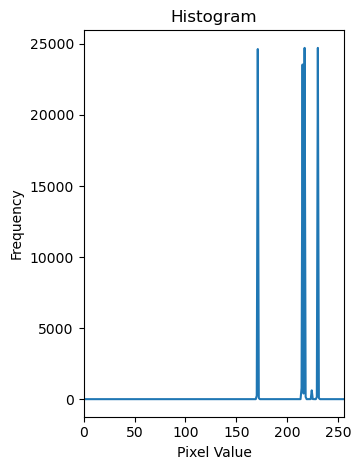

[24721.0, 24720.0, 24640.0, 23551.0]


In [120]:
image = cv2.imread('Data/fig1.jpg')

# Check if the image was loaded successfully
if image is not None:

    # Convert the colored images to grayscale
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    DetermineArea(image)
    
else:
    print("Failed to load image.")

### Question 5

In [123]:
def DetermineAreaArrow(image):
    
    cv2.imshow('Grayscale Image', image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

    # Display the histogram
    plt.subplot(1, 2, 2)
    plt.title('Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.plot(histogram)
    plt.xlim([0, 256])

    # Show the images and histogram
    plt.tight_layout()
    plt.show()


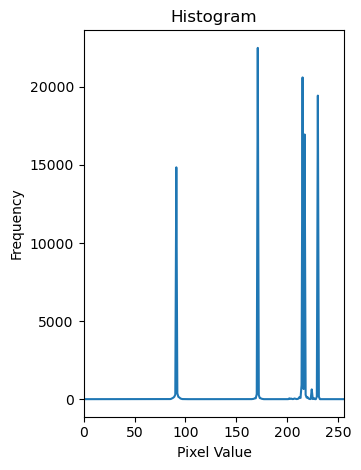

In [124]:
image = cv2.imread('Data/fig2.jpg')

# Check if the image was loaded successfully
if image is not None:

    # Convert the colored images to grayscale
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    DetermineAreaArrow(image)
    
else:
    print("Failed to load image.")

### Question 6

In [105]:
# Function to segment the bones of a finger
def SegmentBones(image):

    # Calculate the histogram
    histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

    # Display the image
    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    plt.imshow(image, cmap='gray')
    plt.title('Image')

    # Display the histogram
    plt.subplot(122)
    plt.plot(histogram)
    plt.title('Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.xlim(0,255)
    plt.ylim(0,600)

    plt.show()



    # Create a binary mask based on the intensity range
    binary_mask = cv2.inRange(image, 105, 120)

    # Apply the binary mask to the original image to segment it
    segmented_image1 = cv2.bitwise_and(image, image, mask=binary_mask)

    
    # Create a binary mask based on the intensity range
    binary_mask = cv2.inRange(image, 180, 200)

    # Apply the binary mask to the original image to segment it
    segmented_image2 = cv2.bitwise_and(image, image, mask=binary_mask)
    
    # Create a binary mask based on the intensity range
    binary_mask = cv2.inRange(image, 20, 50)

    # Apply the binary mask to the original image to segment it
    segmented_image3 = cv2.bitwise_and(image, image, mask=binary_mask)
    
    # Create a binary mask based on the intensity range
    binary_mask = cv2.inRange(image, 85, 90)

    # Apply the binary mask to the original image to segment it
    segmented_image4 = cv2.bitwise_and(image, image, mask=binary_mask)

    
    # Show the images in their respective windows
    #cv2.imshow('Segment 1', segmented_image1)
    #cv2.imshow('Segment 2', segmented_image2)
    #cv2.imshow('Segment 3', segmented_image3)
    cv2.imshow('Segment 4', segmented_image4)

    # Wait for a key press and close the windows when a key is pressed
    cv2.waitKey(0)
    cv2.destroyAllWindows()





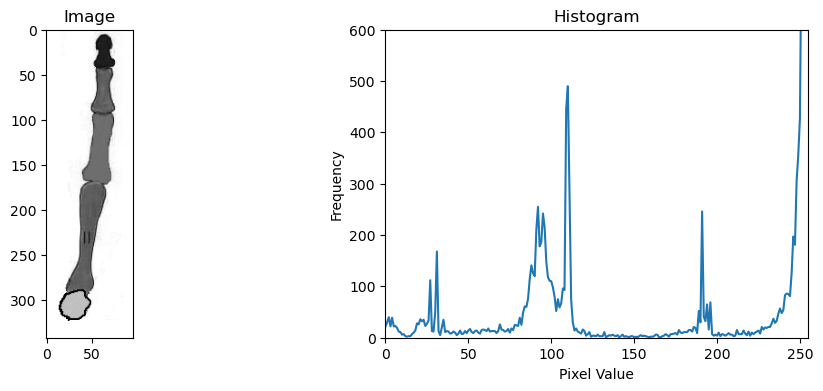

In [106]:
image = cv2.imread('Data/finger-bones.jpg')

# Check if the image was loaded successfully
if image is not None:

    # Make the image more vibrant

    # Convert the image from BGR to HSV color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Increase the saturation (adjust the value as needed)
    saturation_factor = 3.0  
    hsv_image[..., 1] = np.clip(hsv_image[..., 1] * saturation_factor, 0, 255)

    # Convert the image back to BGR color space
    vibrant_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2BGR)

    image = cv2.cvtColor(vibrant_image, cv2.COLOR_BGR2GRAY)

    SegmentBones(image)
    
else:
    print("Failed to load image.")

In [40]:
import cv2
import numpy as np

# Load the grayscale image
image = cv2.imread('Data/finger-bones.jpg', cv2.IMREAD_GRAYSCALE)

